# Projeto: análise de sentimentos

## Isso é um código capaz de fornecer uma ideia da opinião dos consumidores acerca de um produto ou serviço. Para ele funcionar, seria necessário apenas carregar uma base de dados com frases (as opiniões) dos consumidores e rodar o código.

## A partir disso, você teria mais que uma ideia acerca do que os consumidores estão achando acerca desse produto/serviço.



---



### Carregando as bibliotecas principais utilizadas ao longo do trabalho inteiro:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Instalar bibliotecas necessárias
!pip install spacy
!pip install wordcloud

# Baixar o modelo de linguagem português para spaCy
!python -m spacy download pt_core_news_sm

# Importar bibliotecas
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Carregar o modelo spaCy para português
nlp = spacy.load("pt_core_news_sm")

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Carregar as stop words em português do NLTK
stop_words_nltk = set(stopwords.words('portuguese'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 71.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Frases iniciais para treinar a máquina:

In [ ]:
frases = [
    "O produto é bom e excelente",
    "O atendimento foi excelente",
    "A qualidade é ruim, muito ruim",
    "Experiência terrível, muito ruim",
    "Muito bom, adorei o produto",
    "Péssimo, não gostei nada, joguei meu dinheiro fora!",
    "Esse produto é top demais, adorei!!!",
    "Atendimento muito bom, super recomendo!",
    "Que lixo, veio quebrado e sem manual.",
    "Show de bola, melhor compra que já fiz!",
    "Produto chegou no prazo, funcionando perfeitamente",
    "Decepcionante, não vale o preço que paguei",
    "Ótimo custo-benefício, recomendo fortemente",
    "Péssima qualidade, arrependido da compra",
    "Superou minhas expectativas, estou muito satisfeito",
    "Entrega rápida e produto em perfeito estado",
    "Não recomendo, produto de baixa qualidade",
    "Excelente atendimento ao cliente, resolveram meu problema rapidamente",
    "Produto não corresponde à descrição, estou insatisfeito",
    "Melhor compra que fiz este ano, valeu cada centavo",
    "Interface intuitiva, fácil de usar",
    "Bugs constantes, aplicativo trava muito",
    "Design elegante e moderno",
    "Péssima experiência de usuário, muito complicado de usar",
    "Ótimas funcionalidades, superou minhas expectativas",
    "Lento e ineficiente, precisa de muitas melhorias",
    "Excelente relação custo-benefício",
    "Caro demais para o que oferece",
    "Ótimo suporte técnico, sempre dispostos a ajudar",
    "Péssimo serviço pós-venda, nunca mais compro aqui"
]

#sentimentos 0-> positivo, 1-> negativo
sentimentos_num = [
               0, 0, 1, 1, 0,
               1, 0, 0, 1, 0,
               0, 1, 0, 1, 0,
               0, 1, 0, 1, 0,
               0, 1, 0, 1, 0,
               1, 0, 1, 0, 1
               ]

sentimentos = []

for sentimento in sentimentos_num:
    if sentimento == 0:
        sentimentos.append ("Positivo")
    else:
        sentimentos.append("Negativo")

### Colocando esses dados iniciais em uma tabela, df:

In [ ]:
#vou colocar em uma tabela, df
df = pd.DataFrame({'Frase': frases, 'Sentimento': sentimentos})
print('Veja as 5 primeiras linhas da tabela:')
df.head()

Veja as 5 primeiras linhas da tabela:


,Frase,Sentimento
0,O produto é bom e excelente,Positivo
1,O atendimento foi excelente,Positivo
2,"A qualidade é ruim, muito ruim",Negativo
3,"Experiência terrível, muito ruim",Negativo
4,"Muito bom, adorei o produto",Positivo


### Visualizando a distribuição de comentários positivos e negativos da amostra de treino inicial:

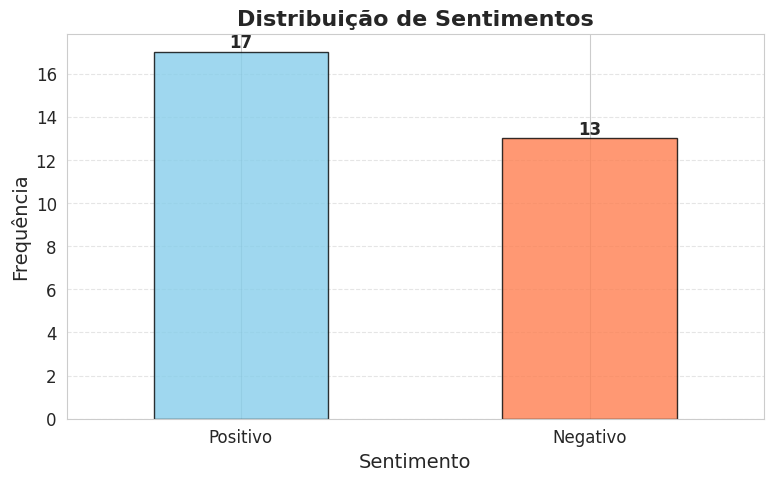

In [ ]:
# Contando a frequência de cada sentimento
sentimento_counts = df['Sentimento'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(9, 5))
ax = sentimento_counts.plot(kind='bar', color=['skyblue', 'coral'], alpha=0.8, edgecolor='black')

# Adicionando título e rótulos dos eixos
plt.title('Distribuição de Sentimentos', fontsize=16, fontweight='bold')
plt.xlabel('Sentimento', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Adicionando rótulos de dados nas barras
for i, value in enumerate(sentimento_counts):
    plt.text(i, value + 0.2, f'{value}', ha='center', fontsize=12, fontweight='bold')

# Ajustando as configurações dos ticks e da grid
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.2, color='gray')

# Exibindo o gráfico
plt.show()

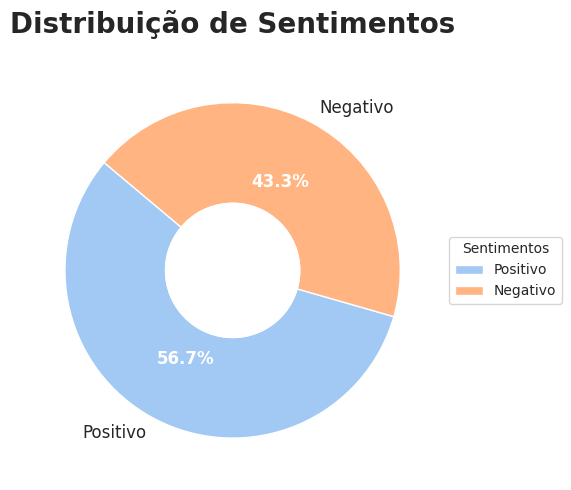

In [ ]:
# Configurando o estilo do Seaborn para um visual mais moderno
sns.set_style("whitegrid")

# Criando o gráfico de pizza
plt.figure(figsize=(8, 5))
colors = sns.color_palette("pastel")[0:2]

wedges, texts, autotexts = plt.pie(sentimento_counts,
                                   labels=sentimento_counts.index,
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   wedgeprops=dict(width=0.6, edgecolor='white'))

# Adicionando um círculo no centro para criar um efeito de rosca
centre_circle = plt.Circle((0,0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Estilizando os textos
plt.setp(autotexts, size=12, weight="bold", color="white")
plt.setp(texts, size=12)

# Adicionando título
plt.title('Distribuição de Sentimentos', fontsize=20, fontweight='bold', pad=20)

# Adicionando uma legenda
plt.legend(wedges, sentimento_counts.index,
           title="Sentimentos",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

### Vou treinar o modelo:

### Separo as variáveis, carrego, treino e faço as previsões com base na modelagem estatística de machine learning Naive Bayes:

In [ ]:
# Convertendo as frases para vetores de contagem de palavras
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(frases)

In [ ]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, sentimentos, test_size=0.2, random_state=42)

# Inicializando o modelo Multinomial Naive Bayes
modelo = MultinomialNB()

# Treinando o modelo
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

### Medir a precisão do modelo:

In [ ]:
# Avaliando a precisão do modelo
acuracia = accuracy_score(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)

acuracia = acuracia*100
print(f"Acurácia do modelo: {acuracia:.2f}%")
print("\nRelatório de Classificação:\n", relatorio_classificacao)

Acurácia do modelo: 83.33%

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       1.00      0.67      0.80         3
    Positivo       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



### Carrego novos comentários para testar como o modelo treinado desempenha para dados novos:

In [ ]:
novos_comentarios = [
    "Terrível, demorou pra chegar e não funciona.",
    "Tudo certo com a compra, gostei bastante.",
    "Horrível, nunca mais compro aqui, que decepção.",
    "Produto excelente, funciona perfeitamente!",
    "Nada bom, esperava mais qualidade pelo preço."
]

# Rótulos reais dos novos comentários
respostas_novos = ["Negativo", "Positivo", "Negativo", "Positivo", "Negativo"]

### Prevendo quais novos comentários colocados são positivos e quais são negativos e calculando a precisão do modelo para esses novos dados:

In [ ]:
# Convertendo os novos comentários para vetores de contagem de palavras
X_novos = vectorizer.transform(novos_comentarios)

# Fazendo previsões para os novos comentários
previsoes = modelo.predict(X_novos)

# Avaliando a acurácia para os novos comentários
acuracia_novos = accuracy_score(respostas_novos, previsoes)
print(f"Acurácia para os novos comentários: {acuracia_novos*100:.2f}%")

Acurácia para os novos comentários: 80.00%


### Visualizando errros e acertos do novo modelo:

In [ ]:
# Identificar previsões corretas e incorretas
comentarios_corretos = []
comentarios_incorretos = []
respostas_incorretas = []

for comentario, previsao, resposta_novo in zip(novos_comentarios, previsoes, respostas_novos):
    if previsao == resposta_novo:
        comentarios_corretos.append(comentario)
    else:
        comentarios_incorretos.append(comentario)
        respostas_incorretas.append(resposta_novo)

# Exibir previsões corretas e incorretas
print("\nPrevisões corretas:")
for comentario in comentarios_corretos:
    print(f"Comentário: '{comentario}' - Resposta correta: {resposta_novo}")

print("\nPrevisões incorretas:")
for comentario, rotulo_real in zip(comentarios_incorretos, respostas_incorretas):
    print(f"Comentário: '{comentario}' - Resposta incorreta: {resposta_novo}")


Previsões corretas:
Comentário: 'Terrível, demorou pra chegar e não funciona.' - Resposta correta: Negativo
Comentário: 'Horrível, nunca mais compro aqui, que decepção.' - Resposta correta: Negativo
Comentário: 'Produto excelente, funciona perfeitamente!' - Resposta correta: Negativo
Comentário: 'Nada bom, esperava mais qualidade pelo preço.' - Resposta correta: Negativo

Previsões incorretas:
Comentário: 'Tudo certo com a compra, gostei bastante.' - Resposta incorreta: Negativo


### O modelo errou 1 de 5 novos comentários. Taxa de acerto de 80%!

### Vou pegar esses novos comentários e combinar com os dados iniciais para aumentar a amostra de treino do modelo inicial.

### A ideia é que quanto maior a amostra mais preciso será o modelo de previsão.

### Veja: vou juntar as frases iniciais e as novas para re-treinar o modelo e melhorar a precisão dele

In [ ]:
# Re-treinar o modelo com os comentários incorretos
if comentarios_incorretos:
    X_incorretos = vectorizer.transform(comentarios_incorretos)
    modelo.partial_fit(X_incorretos, respostas_incorretas, classes=["Positivo", "Negativo"])

### Juntar as frases iniciais e as novas em uma tabela só:

In [ ]:
# Atualizando o conjunto de dados
frases_atualizadas = frases + novos_comentarios
sentimentos_atualizados = sentimentos + respostas_novos

#concatenar isso no df
df = pd.DataFrame({'Frase': frases_atualizadas, 'Sentimento': sentimentos_atualizados})

### Veja como ficou a tabela após juntar tudo:

In [ ]:
df

,Frase,Sentimento
0,O produto é bom e excelente,Positivo
1,O atendimento foi excelente,Positivo
2,"A qualidade é ruim, muito ruim",Negativo
3,"Experiência terrível, muito ruim",Negativo
4,"Muito bom, adorei o produto",Positivo
5,"Péssimo, não gostei nada, joguei meu dinheiro ...",Negativo
6,"Esse produto é top demais, adorei!!!",Positivo
7,"Atendimento muito bom, super recomendo!",Positivo
8,"Que lixo, veio quebrado e sem manual.",Negativo
9,"Show de bola, melhor compra que já fiz!",Positivo


### Re-treinando o modelo novamente agora com todas as frases:

In [ ]:
X_atualizado = vectorizer.fit_transform(df['Frase'])
# Dividindo os dados em conjuntos de treino e teste
X_train_atualizado, X_test_atualizado, y_train_atualizado, y_test_atualizado = train_test_split(X_atualizado, df['Sentimento'], test_size=0.2, random_state=42)

# Inicializando o modelo
modelo = MultinomialNB()

# Treinando o modelo com o conjunto de dados atualizado
modelo.fit(X_train_atualizado, y_train_atualizado)

# Fazendo previsões no conjunto de teste atualizado
y_pred_atualizado = modelo.predict(X_test_atualizado)

# Avaliando a nova precisão do modelo
nova_acuracia = accuracy_score(y_test_atualizado, y_pred_atualizado)
print(f"\nNova acurácia do modelo após re-treinamento: {nova_acuracia*100:.2f}%")
print("\nNovo Relatório de Classificação:\n", classification_report(y_test_atualizado, y_pred_atualizado))


Nova acurácia do modelo após re-treinamento: 85.71%

Novo Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       1.00      0.67      0.80         3
    Positivo       0.80      1.00      0.89         4

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



### Veja que o percentual de precisão aumentou para +85%.

### Conforme aumentamos a base de treinamento da máquina melhor ela ficará em diferenciar comentários positivos e negativos!

### visualizando o percentual de comentários positivos e negativos em um gráfico de pizza

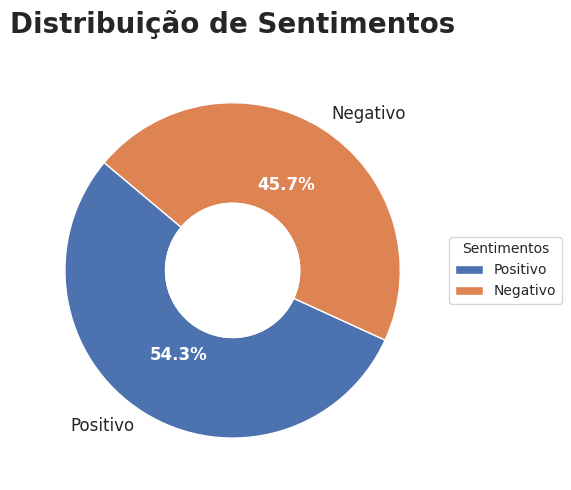

Sentimento
Positivo    19
Negativo    16
Name: count, dtype: int64


In [ ]:
#visualizar isso em um gráfico de pizza
# Contagem de sentimentos
sentimento_counts = df['Sentimento'].value_counts()

# Configurando o estilo do Seaborn para um visual mais moderno
sns.set_style("whitegrid")

# Criando o gráfico de pizza
plt.figure(figsize=(8, 5))

# Nova paleta de cores mais vibrante
colors = sns.color_palette("deep")

wedges, texts, autotexts = plt.pie(sentimento_counts,
                                   labels=sentimento_counts.index,
                                   colors=colors,
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   wedgeprops=dict(width=0.6, edgecolor='white'))

# Adicionando um círculo no centro para criar um efeito de rosca
centre_circle = plt.Circle((0,0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Estilizando os textos
plt.setp(autotexts, size=12, weight="bold", color="white")
plt.setp(texts, size=12)

# Adicionando título
plt.title('Distribuição de Sentimentos', fontsize=20, fontweight='bold', pad=20)

# Adicionando uma legenda
plt.legend(wedges, sentimento_counts.index,
           title="Sentimentos",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

# Imprimindo os dados para verificação
print(sentimento_counts)



---



## Vou criar uma nuvem de palavras com as palavras mais frequentes encontradas nos comentários:

In [ ]:
# Configurar as stop words personalizadas
stop_words_nltk = set(stopwords.words('portuguese'))
stop_words_personalizadas = {"é", "foi", "está", "joguei"}
stop_words_nltk.update(stop_words_personalizadas)

# Função para remover stop words
def remove_stop_words(frases):
    frases_sem_stopwords = []

    for frase in frases:
        doc = nlp(frase)
        frase_sem_stopwords = ' '.join([token.text for token in doc if token.text.lower() not in stop_words_nltk])
        frases_sem_stopwords.append(frase_sem_stopwords)

    return frases_sem_stopwords

# Função para extrair adjetivos e verbos
def extrair_adjetivos_verbos(frases):
    frases_filtradas = []

    for frase in frases:
        doc = nlp(frase)
        palavras_filtradas = [token.text for token in doc if token.pos_ in ['ADJ', 'VERB']]
        frases_filtradas.append(" ".join(palavras_filtradas))

    return frases_filtradas

In [ ]:
# Remover stop words das frases
frases_sem_stopwords = remove_stop_words(df['Frase'])

# Extrair adjetivos e verbos das frases filtradas
frases_filtradas = extrair_adjetivos_verbos(frases_sem_stopwords)

# Atualizar o DataFrame com as frases processadas
df['Frases_filtradas'] = frases_filtradas

In [ ]:
df

,Frase,Sentimento,Frases_filtradas
0,O produto é bom e excelente,Positivo,bom excelente
1,O atendimento foi excelente,Positivo,excelente
2,"A qualidade é ruim, muito ruim",Negativo,ruim ruim
3,"Experiência terrível, muito ruim",Negativo,terrível ruim
4,"Muito bom, adorei o produto",Positivo,bom adorei
5,"Péssimo, não gostei nada, joguei meu dinheiro ...",Negativo,gostei
6,"Esse produto é top demais, adorei!!!",Positivo,top adorei
7,"Atendimento muito bom, super recomendo!",Positivo,bom super recomendo
8,"Que lixo, veio quebrado e sem manual.",Negativo,lixo veio quebrado manual
9,"Show de bola, melhor compra que já fiz!",Positivo,melhor fiz


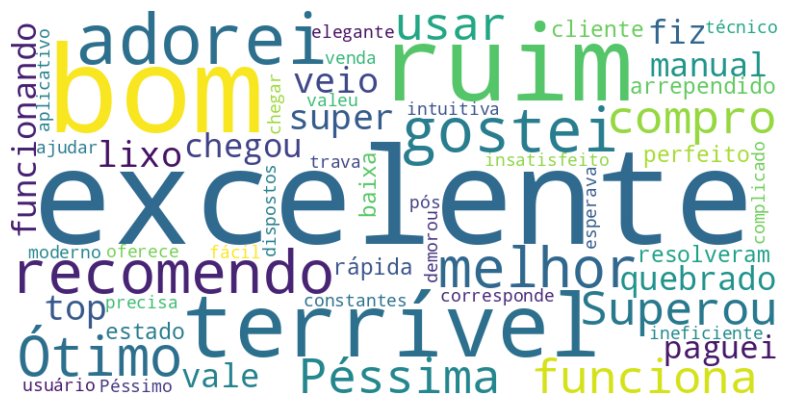

In [ ]:
# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(" ".join(frases_filtradas))

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Maior a palavra mais frequente ela é no conjunto de frases contendo as opiniões.

### Nuvem de palavras filtrado apenas com os comentários positivos:

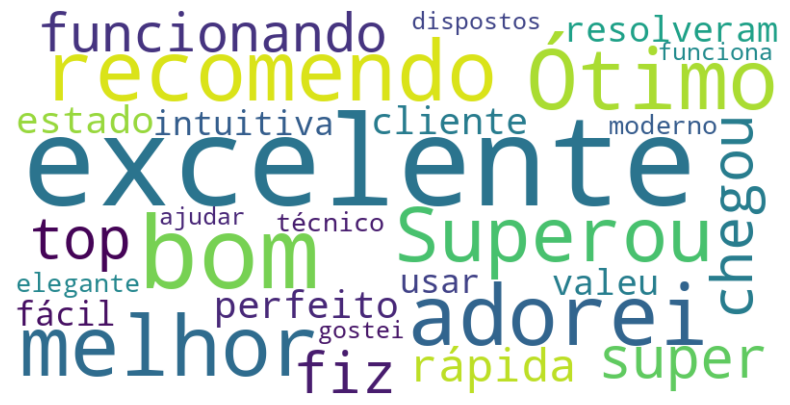

In [ ]:
# Filtrar apenas as frases com sentimento positivo
frases_positivas = df[df['Sentimento'] == "Positivo"]['Frases_filtradas']

text = ' '.join(frases_positivas)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

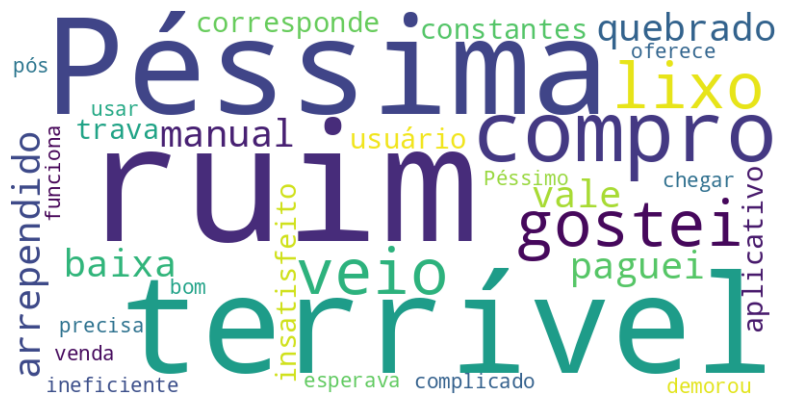

In [ ]:
# Filtrar apenas as frases com sentimento positivo
frases_negativas = df[df['Sentimento'] == "Negativo"]['Frases_filtradas']

text = ' '.join(frases_negativas)

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



---



---



## O código abaixo foi para testar qual era o melhor modelo para os dados. Puro tecnicismo...

In [ ]:
# Convertendo as frases para vetores de contagem de palavras
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Frase'])
y = df['Sentimento']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Função para ajustar e avaliar modelos
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

# Definindo diferentes modelos para teste
models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Treinando e avaliando os modelos
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Exibindo os resultados
print("Acurácia dos modelos:")
for model_name, score in model_scores.items():
    print(f"{model_name}: {score:.2f}")

Acurácia dos modelos:
Naive Bayes: 0.86
Decision Tree: 0.57
Random Forest: 0.86
Gradient Boosting: 0.57
SVM: 0.71
Logistic Regression: 0.71
